In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
#Importing the libraries

In [10]:
from google.colab import files
uploaded = files.upload()
#Google colab thing

Saving train.csv to train.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [16]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As you might can see there are 42000 rows with 785 columns, 784 with the exclusion of the label column. We have 784 columns because the images we are going to predict are 28x28 pixels. There are 42000 hand-written numbers.

In [0]:
target = df['label'].values #Taking the dependant values

In [0]:
df = df.drop('label',axis=1) #Dropping it from the dataset

In [0]:
df = df.values #Taking just the values

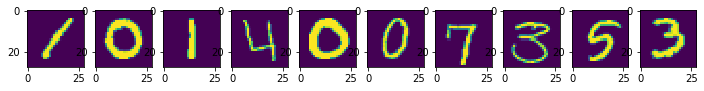

In [20]:
x,y = 10,4
plt.figure(figsize=(12,10))
for i in range(10):
  plt.subplot(y,x,i+1)
  plt.imshow(df[i].reshape((28,28)))
plt.show()

Here I am just showing how the dataset looks like. It consist of 4200 images of this kind, 28x28 pixels.

In [0]:
from sklearn.model_selection import train_test_split #Importing the needed function

In [0]:
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=0.2) #Applying the function to get a set to test on

In [23]:
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential #Importing the needed layers and models from keras

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1) 

I am reshaping  X_train and X_test because for the Conv2D layer of the network it is mandatory to have the input shape as a 3D array.

In [0]:
model = Sequential() #Model allows us to add more and more layers like this

In [26]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


The first layer is a Conv2D one. The first input which I did not specify in the layer is filters, in this case 32. This filter goes through the image with the next input variable - kernel size, in this case 3x3 and with a default stride.The filters are just some numbers which detect certain features in the image. The more filters, the more the algorithm could potentionally detect. It is doing this movement with size 3x3, which is just the matrix of numbers which detect the features, and lastly this 3x3 matrix moves with a stride,which was not specified by me here. The activations(except in the last layer) are all relu.Input shape is specified only in the first layer. Kernel initialzer initializes the weights of our model, to help the performance.

MaxPooling layer takes the highest number from this 2x2 matrix and from 4 values makes it 1 value.This way the algorithm works faster with fewer data,and we do not have missing data.

Dropout is a overfitting measure.

Flatten layer flattens the data. Then it gets transferred into a neural network,which is different from what we had before that.

Dense are just how many nodes or neurons are in this layer. And finally softmax function is applied - in order to get all the 10 classes we have.

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Adam optimizer is adjusting the weights accordingly in order the algorithm to converge.
Loss was suggested to me by Tensorflow
Metrics is just a visual component for later

In [28]:
model.fit(X_train,y_train,batch_size=40,epochs=10,verbose=1) #Training the algorithm.

Train on 33600 samples
Epoch 1/10
33600/33600 [==============================] - 50s 2ms/sample - loss: 5.8964 - acc: 0.2442
Epoch 2/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 1.5150 - acc: 0.4793
Epoch 3/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.8691 - acc: 0.7138
Epoch 4/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.5272 - acc: 0.8374
Epoch 5/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.3804 - acc: 0.8888
Epoch 6/10
33600/33600 [==============================] - 49s 1ms/sample - loss: 0.3045 - acc: 0.9091
Epoch 7/10
33600/33600 [==============================] - 51s 2ms/sample - loss: 0.2552 - acc: 0.9288
Epoch 8/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.2212 - acc: 0.9363
Epoch 9/10
33600/33600 [==============================] - 50s 1ms/sample - loss: 0.1968 - acc: 0.9436
Epoch 10/10
33600/33600 [==============================] - 

In [0]:
y_pred = model.predict(X_test[:5]) #Making a prediction for the first five digits

In [55]:
print(np.argmax(y_pred,axis=1))
print(y_test[:5]) #Just some fancy code to extract the digit

[8 1 3 9 7]
[8 1 3 9 7]


In [0]:
score = model.evaluate(X_test,y_test,verbose=0) #Evaluating the model

In [71]:
print('test loss' + str(score[0]))
print('test accuracy' + str(score[1]))

test loss0.07345594309264838
test accuracy0.97761905


As you can see the test accuracy is near perfect. We could tweak the model, but for now 97% is just perfect.